In [1]:
import os
import numpy as np
import nilearn

# NII & NIFITI files:

All the operations of nilearn are on .nii type objects these include the nii.gz, nifti, and other deriviatives.
With the particular files.

Load them in carefully becasue for nifti image types there are two distinct files the .img and the .hdr type either one will work but you need to pick one (after the .nifti extention).


In [24]:
import nibabel as nib
#set to exact file path
healthy= r'healthy_control\OAS2_0001_MR2\1\123127131\mpr-1.nifti.img'
alz= r'alzhimers_brain\OAS2_0002_MR3\1\123127142\mpr-1.nifti.img'
healthy_img = nib.load(healthy)
alz_img =nib.load(alz)

# Features of the Oasis2 dataset 
ID-> which scan matches to which
Group-> demented or not
Visit-> visit number
MMSE-> mini-mentals tate exam (max 30 closer to max is less demented 
eTIV-> estimated total intercranial volume (relates to brain size)
nWBV-> normalized brain volume
ASF-> atlas scaling factor

In [25]:
import pandas as pd
labels =pd.read_csv("Oasis2_info.csv")
labels.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [26]:
l=labels["MRI ID"]
l.head()

0    OAS2_0001_MR1
1    OAS2_0001_MR2
2    OAS2_0002_MR1
3    OAS2_0002_MR2
4    OAS2_0002_MR3
Name: MRI ID, dtype: object

# Ploting a healthy brain and an alzhimermic brain

All of the scans we are using are anatomical

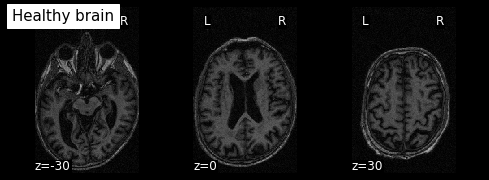

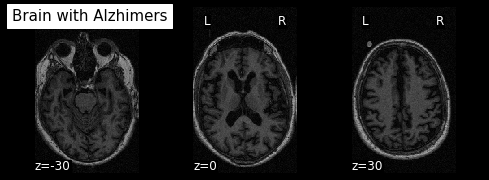

In [28]:
from nilearn import image
from nilearn import plotting 
plotting.plot_anat(healthy_img, cut_coords=(-30,0,30),display_mode='z', title="Healthy brain",draw_cross=False)
plotting.plot_anat(alz_img, cut_coords=(-30,0,30),display_mode='z', title="Brain with Alzhimers",draw_cross=False)

# Processing to make the diffrence clearer
Examples of operations on the image 
As you cans see some smoothing is fine too much makes it a smudge
Interestingly you can use EPI on non EPI/ T2 images

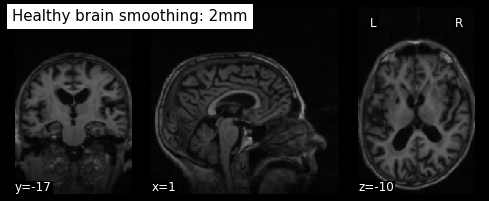

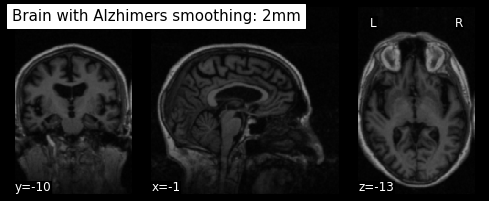

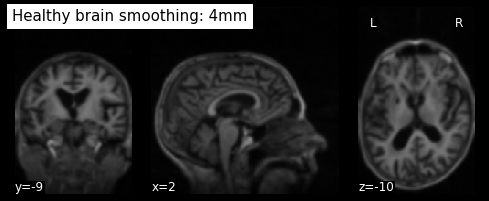

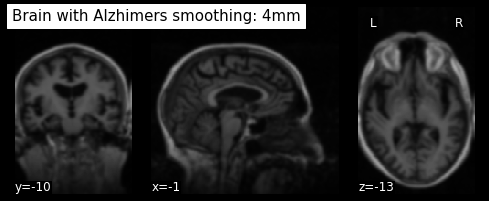

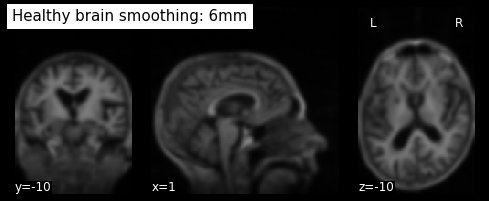

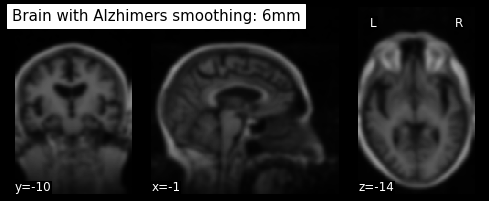

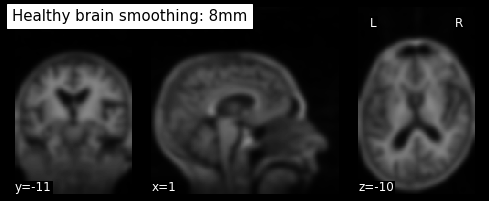

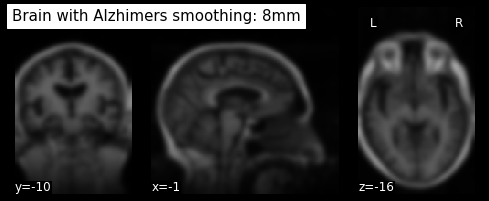

In [38]:
for i in np.arange(2,10,2):
    h_smooth= image.smooth_img(healthy, fwhm=i)  
    h_title="Healthy brain smoothing: "+str(i)+"mm"
    a_smooth = image.smooth_img(alz_img, fwhm=i) 
    a_title="Brain with Alzhimers smoothing: "+str(i)+"mm"
    plotting.plot_anat(h_smooth, title=h_title,draw_cross=False)
    plotting.plot_anat(a_smooth, title=a_title,draw_cross=False)

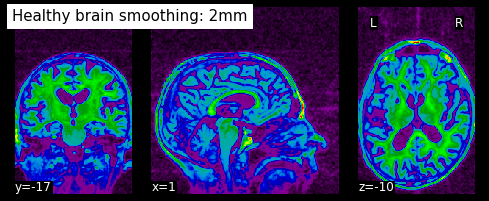

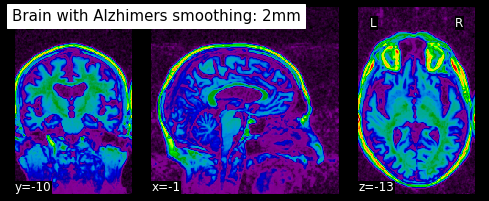

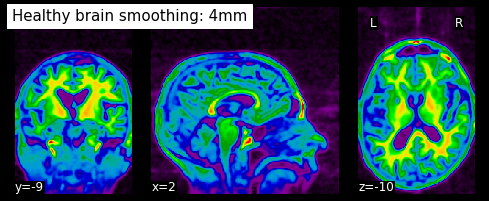

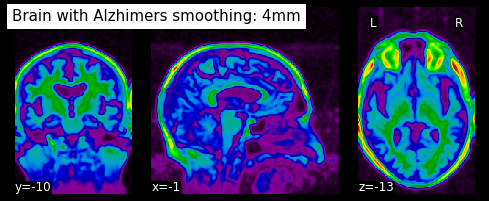

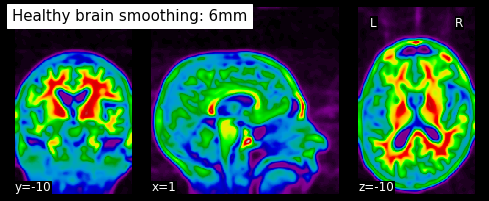

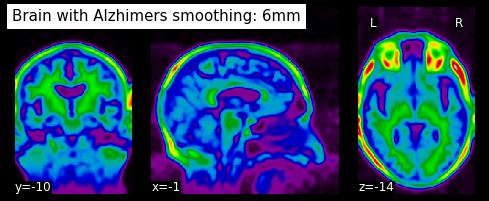

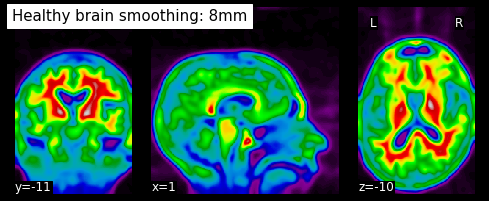

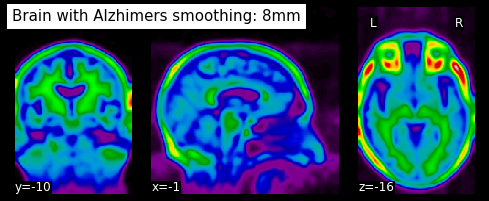

In [39]:
for i in np.arange(2,10,2):
    h_smooth= image.smooth_img(healthy, fwhm=i)  
    h_title="Healthy brain smoothing: "+str(i)+"mm"
    a_smooth = image.smooth_img(alz_img, fwhm=i) 
    a_title="Brain with Alzhimers smoothing: "+str(i)+"mm"
    plotting.plot_epi(h_smooth, title=h_title ,draw_cross=False)
    plotting.plot_epi(a_smooth, title=a_title ,draw_cross=False)

In [ ]:
plotting.view.img(img.slicer[:,:,:,0])


plotting.plot_anat(healthy_img, cut_coords=(-30,0,30),display_mode='z', title="Healthy brain",draw_cross=False)